**@Nourchene V#01033502**

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/nourchene-bargaoui/ML_HW1/main/carSUV_normalized.csv'

Read dataset .csv from Github

In [3]:
# Load the dataset from the CSV file
data = pd.read_csv(url)

Extract numpy 2D (10 x 2) array X of features from pandas
n Extract classes (10D vector Y) from pandas dataframe, convert them from 0/1 to -1/1

In [4]:
# Extract features (X) and classes (Y)
X = data[['ZeroToSixty', 'PowerHP']].to_numpy()
Y = 2 * data[['IsCar']].to_numpy() - 1  # Convert 0/1 to -1/1

In [5]:
print(X)
print(len(X))
print(Y)
print(len(Y))

[[-1.66859537 -0.12867714]
 [-0.94311912  0.01979648]
 [-0.94311912 -0.87104523]
 [ 1.23330962 -1.66290453]
 [ 0.50783338 -1.16799247]
 [ 0.14509525  0.66318216]
 [ 1.59604775 -0.12867714]
 [-0.21764288  0.91063819]
 [ 0.14509525  1.25707664]
 [ 0.14509525  1.10860302]]
10
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]]
10


Define Learning rate and epochs

In [6]:
# Define the learning rate (c) and the number of epochs
learning_rate = 0.01
num_epochs = 1000

Set initial value of w1 and w2 (random)



In [7]:
# Initialize weights w1 and w2 randomly
w1 = np.random.random()
w2 = np.random.random()

Use “error rate” as the measure of model quality

In [8]:
# Lists to store error rates and weights for plotting
error_rates = []
w1_values = []
w2_values = []

In [9]:
# Training loop
#Loop over all 10 training samples
for epoch in range(num_epochs):
    errors = 0

    for i in range(len(X)):
        xi = X[i]
        yi = Y[i]
        prediction = np.sign(w1 * xi[0] + w2 * xi[1])

        #Compare true class yi with predicted class f(xi)

        if prediction != yi: #If prediction is wrong, update w
            w1 += learning_rate * (yi - prediction) * xi[0]
            w2 += learning_rate * (yi - prediction) * xi[1]
            errors += 1   #Update the error rate if incorrect prediction

    error_rate = errors / len(X)  #count how many are wrong, divide by total number of training samples (10)
    error_rates.append(error_rate) #Calculate current error rate:
    w1_values.append(w1)
    w2_values.append(w2)

    if error_rate == 0:
        break

# Final error rate and weights
final_error_rate = error_rates[-1]
final_w1 = w1
final_w2 = w2

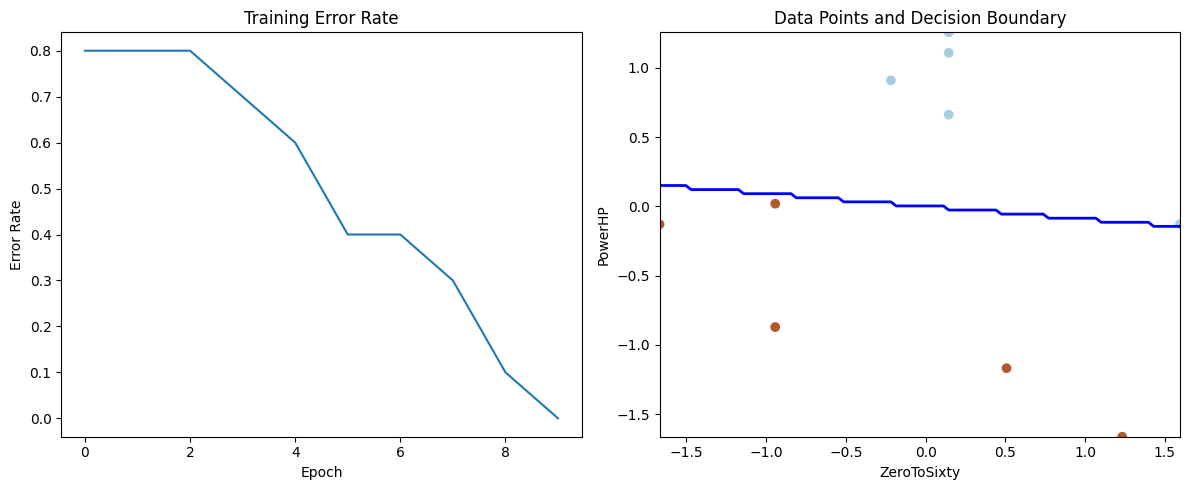

Final Error Rate: 0.0
Final w1: [-0.00887704]
Final w2: [-0.09680922]


In [10]:
# Plot the training progress
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(error_rates)
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.title('Training Error Rate')

# Plot the decision boundary and data points
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('ZeroToSixty')
plt.ylabel('PowerHP')
plt.title('Data Points and Decision Boundary')
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = np.sign(final_w1 * xx + final_w2 * yy)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='blue')

plt.tight_layout()
plt.show()

print("Final Error Rate:", final_error_rate)
print("Final w1:", final_w1)
print("Final w2:", final_w2)

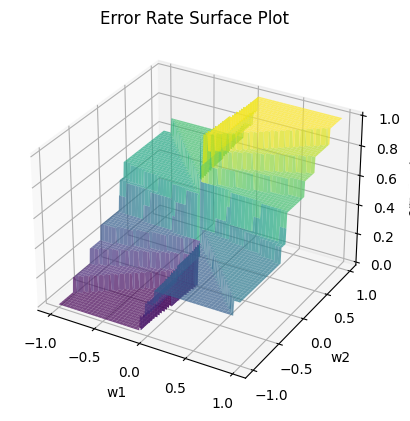

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

def plot_function_on_grid(function_to_plot, datasetX, datasetY):
    # Create a meshgrid
    w1 = np.arange(-1, 1, 0.01)
    w2 = np.arange(-1, 1, 0.01)
    W1, W2 = np.meshgrid(w1, w2)
    error_rates_values_for_W1W2 = function_to_plot(W1, W2, datasetX, datasetY)

    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create the surface plot
    surface = ax.plot_surface(W1, W2, error_rates_values_for_W1W2, cmap='viridis', alpha=0.7)  # alpha value controls transparency
    # Add labels and title
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('error rate')
    ax.set_title('Error Rate Surface Plot')

    return ax

def function_error_rate(w1, w2, datasetX, datasetY):
    # Initialize a matrix to store error rates
    error_rates = np.zeros_like(w1)

    # Loop through each combination of w1 and w2
    for i in range(len(w1)):
        for j in range(len(w2)):
            errors = 0
            # Loop through each data point in the dataset
            for k in range(len(datasetX)):
                xi = datasetX[k]
                yi = datasetY[k]
                # Calculate the predicted class based on w1 and w2
                prediction = np.sign(w1[i, j] * xi[0] + w2[i, j] * xi[1])
                # Compare the predicted class to the true class and count errors
                if prediction != yi:
                    errors += 1
            # Calculate the error rate as the ratio of errors to the total number of data points
            error_rates[i, j] = errors / len(datasetX)

    return error_rates

# Plot the function surface
ax = plot_function_on_grid(function_error_rate, X, Y)
plt.show()
